In [1]:
import networkx as nx
import random as rn
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter ####


In [2]:
# G = nx.read_edgelist("deezerca-AstroPh/out.ca-AstroPh", nodetype=int, comments='%')
# G = nx.read_edgelist("ca-AstroPh/out.ca-AstroPh", nodetype=int, comments='%')
G = nx.read_edgelist("14_soc-hamsterster.edges", nodetype=int)
# G = nx.dense_gnm_random_graph(10000,30000)
# plt.show()
# nx.draw(G, with_labels=False)
nv=nx.number_of_nodes(G)
oszt=list(range(nv+10))
print("connected -> " + str(nx.is_connected(G)))
print("csúcszám -> ", nx.number_of_nodes(G))

connected -> False
csúcszám ->  2427


In [3]:
def vegigMegy():
    volt=False
    for v in G.nodes():
        szT=[oszt[sz] for sz in G.neighbors(v)]
        gyak=[szT.count(v) for v in range(nv+10)]
        mx=max(gyak)
        maxok=[v for v in range(nv+10) if gyak[v]==mx ]
        if gyak[oszt[v]]<mx:
            volt=True
            oszt[v]=maxok[rn.randint(0,len(maxok)-1)]
    return volt
        

In [4]:
while True==vegigMegy():
    pass
#print(oszt)

In [6]:
eredm=[[1,1,1] for _ in range(nv+10)]
for v in range(nv+10): 
    szv=oszt[v]
    if v in G: 
        degv=sum([oszt[szom]==szv for szom in G.neighbors(v)]) 
        eredm[szv][0]+=degv 
        eredm[szv][1]+=degv*degv 
        eredm[szv][2]+=1

In [7]:
prexy=[v for v in eredm if v[2]!=0]

In [8]:
f=lambda x: [math.log(x[0]/(math.log(x[2])+1)), math.log(x[1]/(math.log(x[2])+1))]
xy=list(map(f,prexy))


In [9]:
from sklearn.linear_model import LinearRegression
x = np.asarray([[p[0]] for p in xy])
y = np.asarray([p[1] for p in xy])
model = LinearRegression().fit(x, y)
predict_y = model.predict(x)
b0=model.intercept_
b1=model.coef_
print('y =', b0, " + ", b1[0], " * x")


y = -0.0023447559358197104  +  1.5894443687177409  * x


In [10]:
r_sq = model.score(x, y)
print('corr: ', end=' ')
print(format(np.corrcoef([p[0] for p in xy],[p[1] for p in xy])[0,1],'.4f'), end='     ')
print('coef: ', end=' ')
print(format( r_sq, '.4f'))

print('max: ', end='')
print(format(np.max(y-predict_y), '.4f'),end='     ')
rss=np.average(np.square(y-predict_y))
print('rss: ', end='')
print(format(rss,'.4f'))

corr:  0.9963     coef:  0.9927
max: 0.2657     rss: 0.0010


In [11]:
#plt.show()
#nx.draw(G, with_labels=False, node_color = oszt)
#plt.savefig("15_soc-hamsterster.edges_network.png")

#plt.scatter([p[0] for p in xy],[p[1] for p in xy])
#t = np.arange(0., 4, 0.2)
#plt.plot(t, b0+b1*t, 'r--')
#plt.axis([0, 5, 0, 5])
#plt.savefig("14_soc-hamsterster.png")


max: 0.2657     rss: 0.0010


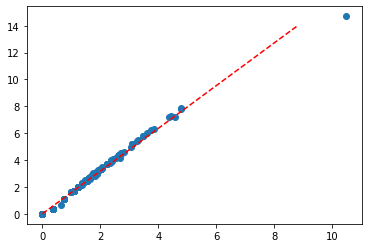

In [12]:
plt.scatter(x,y)
#plt.scatter(x,predict_y)

print('max: ', end='')
print(format(np.max(y-predict_y), '.4f'),end='     ')
#rss=np.average(np.square(y-predict_y))
print('rss: ', end='')
print(format(rss,'.4f'))
#plt.axis([0, 5, 0, 9])

t = np.arange(0., 9, 0.2)
plt.plot(t, b0+b1*t, 'r--')
#plt.savefig("14_soc-hamsterster_line.png")

